# String Manipulation, Regex, and Lamda Functions 

## Python native string operations 

String manipulation is a common task you'll have to execute during data analysis, which can include parsing strings, splitting/breaking them apart, searching, or substituting. Python has some built in tools that are able to perform some basic string manipulations, some of which we've used in previous modules. 

Let's bring in a string-heavy dataset to demonstrate with. We will be using data in file `most_backed.csv` which contains data from the most backed campaigns on the crowd funding platform "Kickstarter", found [here](https://www.kaggle.com/datasets/socathie/kickstarter-project-statistics). 

In [ ]:
import pandas as pd

kst = pd.read_csv('most_backed_edit.csv', nrows = 100)
kst.drop(columns = 'Unnamed: 0', inplace = True)
kst.head(3)

You should already be familiar with string operations such as adding, where we can add characters/strings together. For example we can alter the url column to include the full url, not just the path alone - e.g. `/projects/elanlee/exploding-kittens` becomes `www.kickstarter.com/projects/elanlee/exploding-kittens`. 

We can create a string that contains the domain, and add that to the path to create a string with the full url. For a single string it looks like this: 

In [ ]:
domain = 'www.kickstarter.com'
path = kst.url[0]
domain+path

To apply this to an column in a pandas dataframe, we simply apply the string methods to it as a **series**. Applying string methods to a series will operate on every element in the column. We could then replace the existing column with the altered series. 

In [ ]:
kst['url'] = domain + kst.url
kst.head(3)  

### Stripping a string 

Methods, such as `.strip()` and `.split()` can be added to series as well. When using native python to strip a string `s` you'd use `s.strip()` whereas with a series, `ser` you would use `ser.str.split()`. 

For example, let's strip the newline `\n` from the `blurb` column. Note that we did this in sprint 1 practice 2 using lists, where we used a for loop to access each element in the list. When using a pandas series, you can bypass the for loop and complete the task in a single line! 

In [ ]:
kst.blurb = kst.blurb.str.strip()
kst.blurb

<hr style="border:2px solid gray"> </hr>

### Now you try! 

Look at the values of `kst.category`. Remove the whitespace that occurs before some of the values, e.g. `kst.category[4]`, and replace the column in our `kst` dataframe. 

In [ ]:
### BEGIN SOLUTION 

kst.category = kst.category.str.strip()
kst.category

### END SOLUTION 

<hr style="border:2px solid gray"> </hr>

### Splitting a string 

For splitting, you'd use `str.split()`, which allows us to split a string into a list based on a particular separator. Say we wanted to split the `location` column into two columns where one contains the city & the other contains the state name. We are returned a series where now each element is a **list** containing the split elements. 

In [ ]:
kst.location = kst.location.str.split(', ')
kst.location

If we wanted to turn this series into two columns, we could apply the following where we add two new columns to `kst` and fill them with a new dataframe created by a list of our [city, state] location lists, `kst.location.tolist()`, and the index from `kst`. 

In [ ]:
kst[['city','state']] = pd.DataFrame(kst.location.tolist(), index= kst.index)
kst.head(3)

### Finding & replacing 

We can find certain characters in a string using `str.find()` on a series. This will return the indecies of that character in each string if it exists in the element, and -1 (false) if not. 

In [ ]:
kst.by.str.find('&')

What if we wanted to replace all instances of 'and' in the `by` column with an ampersand to standardize it. We can use `str.replace()` on our series to accomplish this. Be mindful of spaces! If we do not include the beginning and end spaces for our ` and ` input, and the column includes a name like "De**and**ra", we will end up with an ampersand in that person's name, ""De&ra". 

In [ ]:
kst.by = kst.by.str.replace(' and ', ' & ')
kst.by

### Interplolating strings 

A more advanced string method is **interpolating** or **formatting** strings. This is the process by which we can construct a new string where certain placeholders are filled with vairables. While there are [several ways](https://towardsdatascience.com/python-string-interpolation-829e14e1fc75#:~:text=String%20interpolation%20is%20a%20process,ways%20to%20format%20string%20literals.) to accomplish this, a common way to do this is using the `.format()` method. 

With this method we construct a string and add `{}` where we want a variable to fill the placeholder. We then apply the `.format()` method to the string, with input arguments being the variables we want to replace the placeholders in appropraite order. 

Lets create a loop that passes through the first few elements in our dataframe, and for each element use the `title`, `goal`, and `by` columns to construct & print a string statement. 

In [ ]:
for i in range(0, 10):
    title = kst.title[i]
    by = kst.by[i]
    goal = kst.goal[i]
    print("The '{}' campaign by {} has a goal of ${}".format(title, by, goal))

Something similar could be accomplished using **fstrings**, where the prefix `f` is used to signify "literal string interpretation". In this format the variable names are put directly into the `{}`. 

In [ ]:
i = 50
title = kst.title[i]
by = kst.by[i]
goal = kst.goal[i]
print(f'The {title} campaign by {by} has a goal of ${goal}')

<hr style="border:2px solid gray"> </hr>

### Now you try! 

Use either string interpolation method to construct a statement using the `title` and `num.backers` for any entry in the dataframe. 

In [ ]:
### BEGIN SOLUTION 

i = 27
title = kst.title[i]
num_backers = kst['num.backers'][i]
print(f'The {title} campaign has {num_backers} backers who have donated.')

### END SOLUTION 

<hr style="border:2px solid gray"> </hr>

## Using regex for advanced string operations 

**Regex** is a more advanced string operations tool, which allows us to search for, match, and group patterns with the use of **"regular expressions"**. A regular expression is a combination of characters/symbols that define a certain pattern we want to identify or operate on. Using regular expressions allows us to match strings & string patterns in a way far more advanced than what can be done in native python with tools like `.find`. 

Creating regex expressions can seem a bit tricky at first, so its a good idea to keep this [handy cheatsheet](https://www.keycdn.com/support/regex-cheat-sheet) to refer back to. 

When you apply your regex expression to a string, the string is parsed one character at a time from left to right. When a character match is found, then its taken & recorded, and moves on to the next character. This is called "greedy" matching, which we will focus on in this practice. Note that there is also a way to do "non-greedy" matching (with the use of the `?` metacharacter).  

### The `re` module - searching & finding patterns 

Let's start with a few examples. To use regex with python you'll first need to import the `re` module. Let's pull a string from the `blurb` column of our `kst` dataframe to work with. 

In [ ]:
import re
s = kst.blurb[3]
s

Let's search for a literal set of characters, `it` in our string. We will use `re.search()` to do this. This method finds the first match & returns a "match" object.  

In [ ]:
pattern = 'it'
result = re.search(pattern, s)
print(result)

We can extract various properties from the match object. 

In [ ]:
# get matched string from 'result'
print(result.group())
# get starting index
print(result.start())
# get ending index 
print(result.end())
# get span of indecies
print(result.span())
# print from original string using indexes 
s[result.start():result.end()]

But see that there is more than one instance of `it` in our string! If we wanted to find **every** match we would use `re.findall()` which instead of positions returns a **list** of all matches in the order they are found (left to right). See the difference [here](https://www.geeksforgeeks.org/python-regex-re-search-vs-re-findall/). 

In [ ]:
result = re.findall(pattern, s)
print(result)

In [ ]:
# note you cant use the .group(), .span(), etc methods above because this returns a STRING 
result.span()

This example is a bit underwhelming since we are just searching for a literal word right now rather than a pattern - our list will only contain the two strings that match `it`. 

Let's alter this to search for a particular pattern. Say we want to find all words ending with the characters 'able' from this string. 

In [ ]:
s = kst.blurb[13]
s

To search for a pattern this way we need to know about regex's **metacharacters**. These are the characters `\`, `^`, `$`, `.`, `|`, `?`, `*`, `+`, `(`, `)`, `[`, `]`, and `{` which have special meanings in regex (see guide above for full key). Each has a special meaning to regex, so they can't be taken literally - if you want to match any of these characters, they need to be esaped using a backslash to avoid being defaulted to their special meanings. 

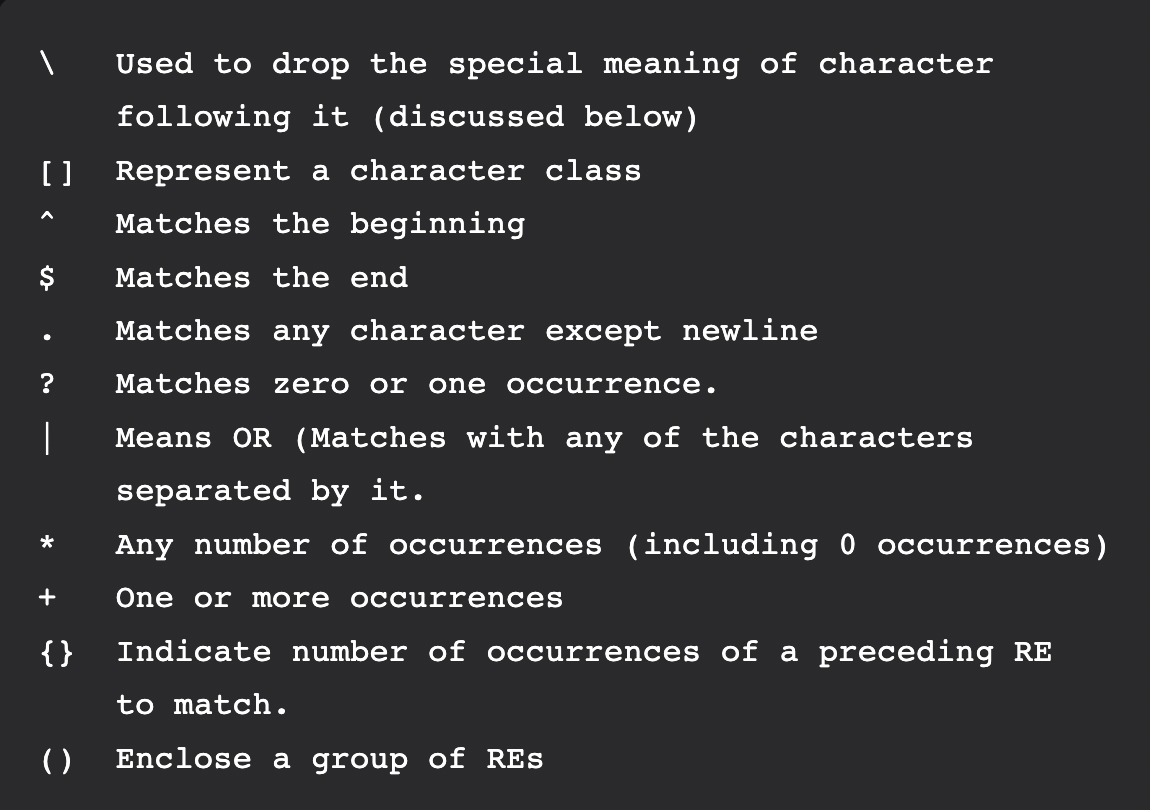
[source](https://www.geeksforgeeks.org/python-regex-re-search-vs-re-findall/)

We will chain the following to help us find our pattern: 

- `\w*`: indicates we want a "word character", gives the entire word up to the sought pattern (`\w+` also works)
- `*`: wildcard, indicates zero or more of any character (grab as much as there is in the word before our ending)
- `able`: the word ending we want to find 


In [ ]:
pattern = '\w+able'
result = re.findall(pattern, s)
print(result)

Great! We've sucessfully used regex to find a pattern in our string. 

<hr style="border:2px solid gray"> </hr>

### Now you try! 

Using regex, find all words in the string (`s = kst.blurb[13]`) that start with a capital A. Remeber that regex is case sensitive! 

In [ ]:
### BEGIN SOLUTION 

s = kst.blurb[13]

pattern = 'A\w+'
result = re.findall(pattern, s)
print(result)

### END SOLUTION 

<hr style="border:2px solid gray"> </hr>

### Compile for re-usable regex

We can also use `.compile()` to create an object that holds our regex expression, and we can feed in any string. Let's compile an expression we name `rc` and then use it to find all instances of commas, exclamation points, question marks, OR ampersands - we can indicate "or" using the pipe symbol `|`. 

Then, we can use it to do different operations on different input strings! 

In [ ]:
rc = re.compile('\,|\!|\?|\&')

# findall 
print(rc.findall(kst.blurb[2]))
print(rc.findall(kst.blurb[10]))
print(rc.findall(kst.blurb[34]))

### Splitting 

As we did in native python, we can also split strings using regex. The difference is that this is more advances as it can be done on **patterns**, not just on literal expressions! Let's split this string on all instances of the "oo" or "ss", as in "b**oo**ks" and "cla**ss**r**oo**ms". 

See that the target pattern ("oo", "ss", "cc") are **not** included in the split list. 

In [ ]:
kst.blurb[2]

In [ ]:
re.split('oo|ss|cc', kst.blurb[2])

We can also used our compiled `rc` object to split on the regex expression we defined above. Now the string is split on `\, !, ?, &` instances. 

In [ ]:
rc.split(kst.blurb[2])

### Replacing 

For a practical example, say we want to create a file for every entry in our dataframe. We want the file name to be the title of the kickstarter campaign. But, its not good practice to include things like spaces or special characters. So we would need to remove all those and replace them with underscores. 

Take a look at this string: 

In [ ]:
kst.title[2]

In this case we would need to remove the spaces, comma, and exclamation point. We can do this with `re.sub()`. We can first replace all spaces with underscores, then replace the punctuation with nothing. 

In [ ]:
string = kst.title[2]
new_string = re.sub('\s+', '_', string)
filename = re.sub('\,|\!', '', new_string)
filename

<hr style="border:2px solid gray"> </hr>

### Now you try! 

Look at the string `kst.blurb[27]`. Replace all capital letters with an asterisk and print the new string. 

In [ ]:
### BEGIN SOLUTION 

re.sub('[A-Z]', '*', kst.blurb[27])

### END SOLUTION 

<hr style="border:2px solid gray"> </hr>

### Groups & subgroups 

Finally, we can **group** expressions, as marked by the `()` metacharacters. This allows us to split what we search for into **subgroups**, allowing us to analyze and break down a string & its patterns into great detail. 

Grouping with regex works kind of like parentheses in math does. The pattern inside the parentheses is grouped as one, and then the qualifiers outside the prentheses are added. Further explanation can be found [here](https://docs.python.org/3/howto/regex.html). 

Let's demonstrate with an example. Look at the string below. 

In [ ]:
kst.blurb[81]

For the sake of demonstration, let's search for literal strings rather than any special patterns. We want to group all instances of Bill Nye's various titles into one match object that contains all his names. 

In [ ]:
pattern = re.compile('((Bill) Nye) (The Science Guy)')
result = pattern.search(kst.blurb[81])
result

The `result` variable is our match object. Unlike in previous examples, we now have **multiple** subgroups! We can look at each subgroup individually by calling the index. 

In [ ]:
print(result.group(0))
print(result.group(1))
print(result.group(2))
print(result.group(3))


Note the order of the results! Index 0 corresponds to the largest group, in other words the most all-encompassing match. 

Then, index 1 and 2 corresponds the leftmost set of parentheses, first the outer "Bill Nye" then the innermost "Bill". 

Finally, index 3 corresponds to the rightmost set of parentheses. 

<hr style="border:2px solid gray"> </hr>

# Practice on your own 

For this practice session you will be working with data on Medium articles, compiled [here](https://www.kaggle.com/datasets/hsankesara/medium-articles). The data is stored in a csv file, named `articles.csv`. The file contains the author, number of "claps", reading time in minutes, a link to the article, the title, as well as the article text. Let's start by reading in and previewing our data. 

In [ ]:
medium = pd.read_csv('articles.csv')
medium.head()

#### Exercise 1. Using python native string operations, find the indecies of all articles titles that mention "Python" (**not** the indecies of 'Python' in the title string!)

In [ ]:
### BEGIN SOLUTION 

python_bool = medium.title.str.find('Python')
python_mention = python_bool[python_bool != -1].values
python_mention 

### END SOLUTION 

#### Exercise 2. You need to create a database in which each author has a folder containing their information & articles. Use the python native string methods to create a new list called 'author_file_names' containing the names in `author` in a file name-appropriate format. This means the names have no spaces or special characters (look for `.`, `&`, and `-`), and is all lowercase. You'll have to remove any whitespace to avoid underscores at the ends of some names. 

In [ ]:
### BEGIN SOLUTION 

author_folder_names = medium.author.str.strip()
author_folder_names = author_folder_names.str.replace(' ', '_')
author_folder_names = author_folder_names.str.replace('.', '')
author_folder_names = author_folder_names.str.lower()
author_folder_names

### END SOLUTION 

#### Exercise 3. Compile a regex expression named `re_ly` that defines a pattern for a word ending in `ly`. Use this expression to find the index of the first instance of this pattern in `medium.text[2]`. Print the span & the found pattern string. 

In [ ]:
### BEGIN SOLUTION 

re_ly = re.compile('\w*ly')
result = re_ly.search(medium.text[2])
print(result.span())
print(result.group())

### END SOLUTION 

#### Exercise 4. use the `re_ly` expression to find **all** the instances of this pattern in `medium.text[2]`. Print all the words that fit the pattern. 

In [ ]:
### BEGIN SOLUTION 

result = re_ly.findall(medium.text[2])
result

### END SOLUTION 

#### Exercise 5. Define a new regex expression named `re_num` which locates any numbers in a string. Apply it to `medium.text[0]` and print the numbers. 

In [ ]:
### BEGIN SOLUTION 

re_num = re.compile('[0-9]+')
re_num.findall(medium.text[0])

### END SOLUTION 

#### Exercise 6. Split `medium.text[0]` into individual lines, and save the result to a list called `list_of_lines`. Loop through each line and if it contains a pattern where a word ends in `ly` OR `ing`, print the line's index & the first instance of the pattern. 

In [ ]:
### BEGIN SOLUTION 

list_of_lines = re.split('\n', medium.text[0])
for ind, line in enumerate(list_of_lines):
    result = re.search('\w+ing|\w+ly', line)
    if result:
        print(ind, result.group())
    else: 
        pass
    
### END SOLUTION 